In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm ,binom, ttest_ind, f_oneway,f, chi2_contingency, chi2

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 15.6MB/s]


In [ ]:
df = pd.read_csv("bike_sharing.csv?1642089089")

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Type Conversion

In [ ]:
df['datetime']= pd.to_datetime(df['datetime'])
df['season']= df['season'].map(str)
df['holiday']= df['holiday'].map(str)
df['workingday']= df['workingday'].map(str)
df['weather']= df['weather'].map(str)

**Data mapping**

In [ ]:
# Data Mapping

season_mapping = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
df["season"] = df["season"].map(lambda x: season_mapping[x])

holiday_mapping = {'0':'no', '1':'yes'}
df["holiday"] = df["holiday"].map(lambda x: holiday_mapping[x])

working_day_mapping = {'0':'no', '1':'yes'}
df["workingday"] = df["workingday"].map(lambda x: working_day_mapping[x])

weather_mapping = {'1':'clear', '2':'partly_clear', '3':'rain', '4':'intense'}
df["weather"] = df["weather"].map(lambda x: weather_mapping[x])

Univariate Analysis for Categorical Columns

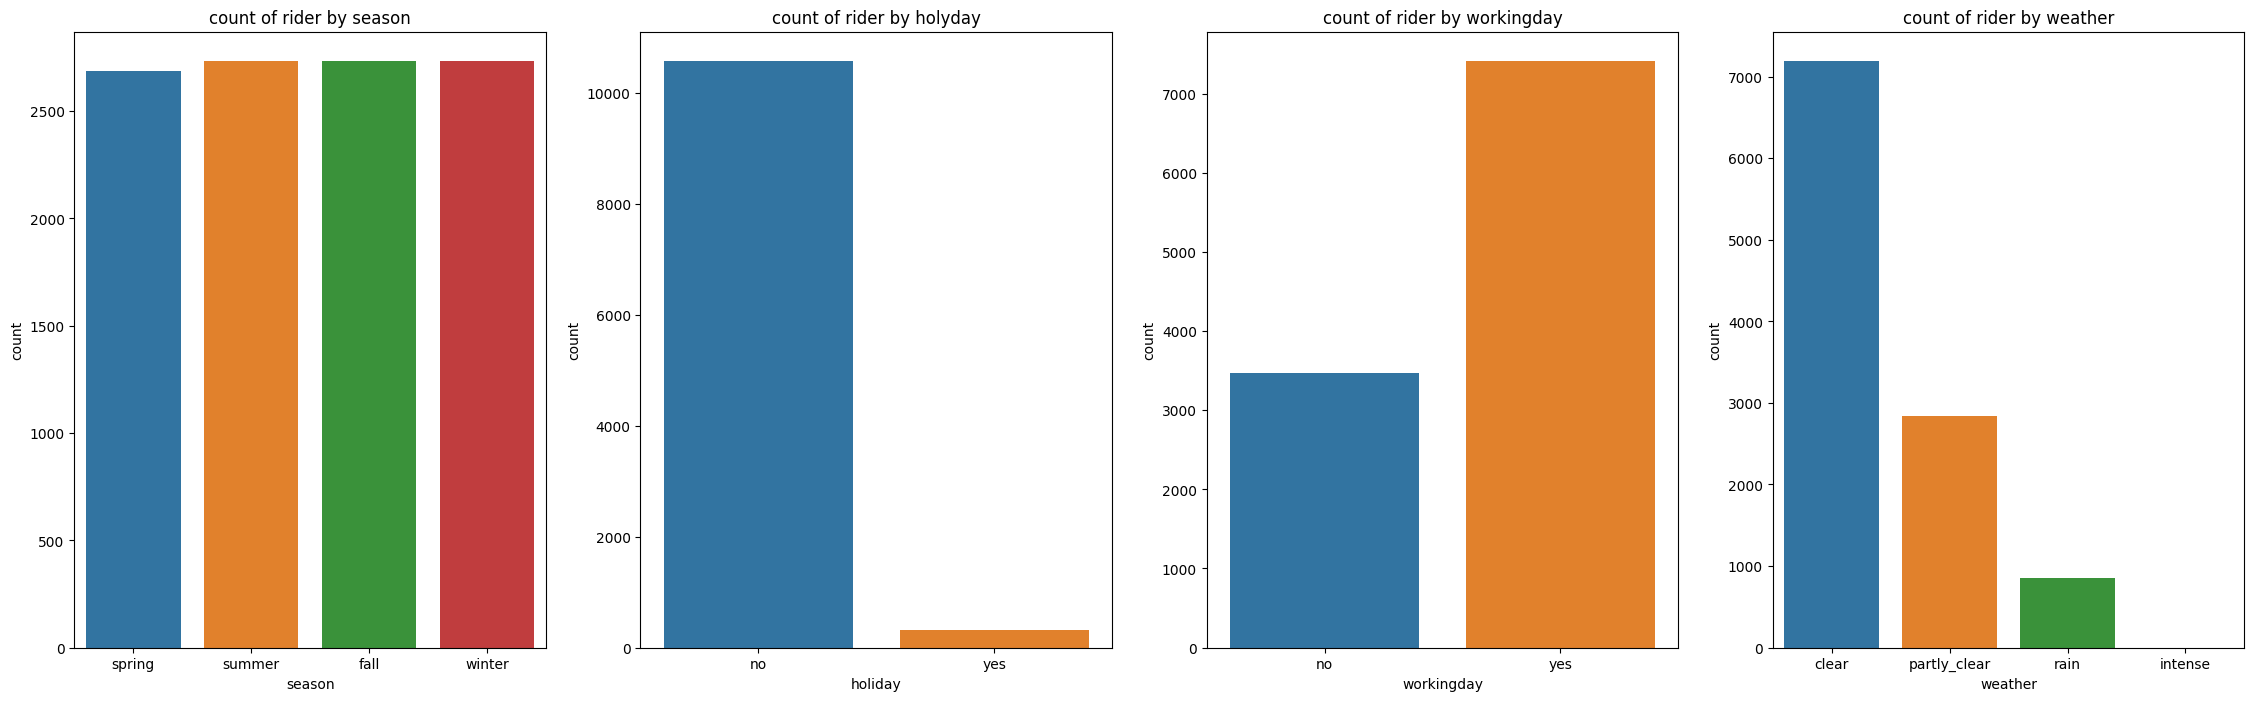

In [ ]:
fig, axes = plt.subplots(1,4, figsize = (28,8))
sns.countplot(x = "season", data = df, ax = axes[0])
axes[0].set_title("count of rider by season")
sns.countplot(x = "holiday", data = df, ax = axes[1])
axes[1].set_title("count of rider by holyday")
sns.countplot(x = "workingday", data = df, ax = axes[2])
axes[2].set_title("count of rider by workingday")
sns.countplot(x = "weather", data = df, ax = axes[3])
axes[3].set_title("count of rider by weather")
plt.show()

## Insights
The number of riders in all seasons is almost the same.

More number of riders ride on non-holidays.

More number of riders  ride on working days.

Nearly of the riders ride on days when the weather is clear or partly clear.

Univariate Analysis for Continous columns


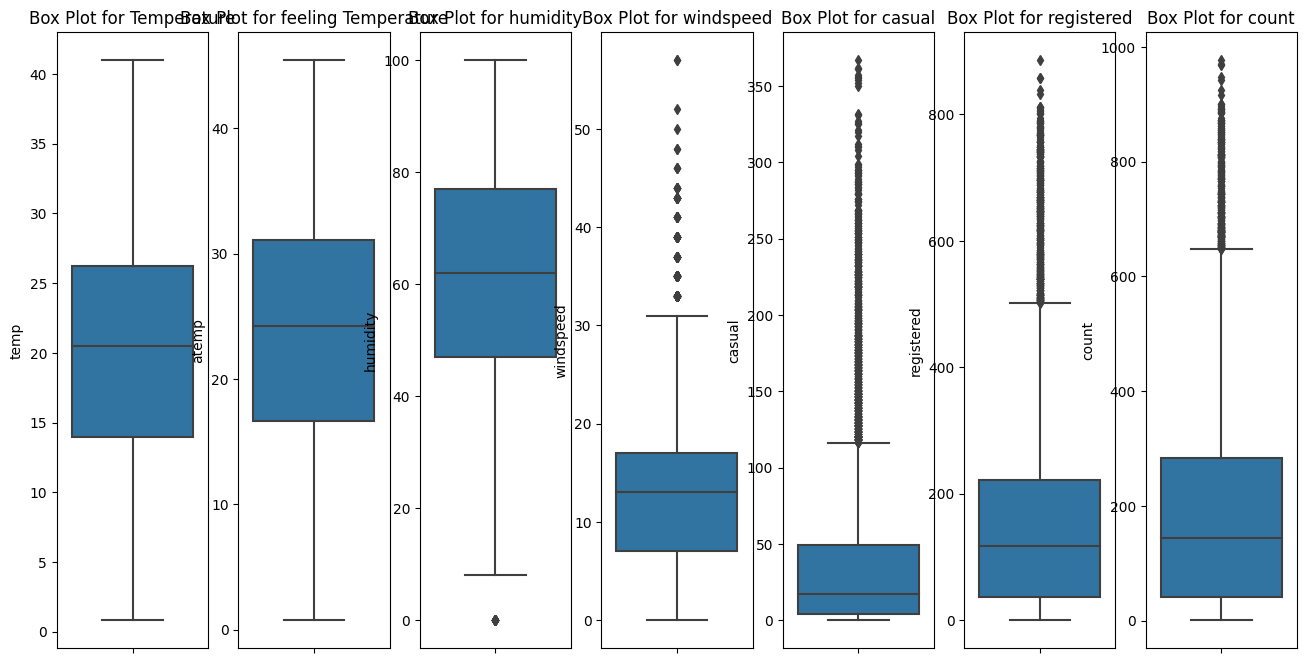

In [ ]:
fig,axes = plt.subplots(1,7,figsize = (16,8))
sns.boxplot(y = "temp", data = df, ax = axes[0])
axes[0].set_title('Box Plot for Temperature')
sns.boxplot(y = "atemp", data = df, ax = axes[1])
axes[1].set_title('Box Plot for feeling Temperature')
sns.boxplot(y = "humidity", data = df, ax = axes[2])
axes[2].set_title('Box Plot for humidity')
sns.boxplot(y = "windspeed", data = df, ax = axes[3])
axes[3].set_title('Box Plot for windspeed')
sns.boxplot(y = "casual", data = df, ax = axes[4])
axes[4].set_title('Box Plot for casual')
sns.boxplot(y = "registered", data = df, ax = axes[5])
axes[5].set_title('Box Plot for registered')
sns.boxplot(y = "count", data = df, ax = axes[6])
axes[6].set_title('Box Plot for count')
plt.show()

Insights:

The mean and the median temperature in the dataset is approximately around 20°C.

The mean and the median feeling temperature in the dataset is approximately around 24°C.

The mean and the median humidity in the dataset is approximately around 62%.

The windspeed is approximately around 13, with large number of outliers.

There is a large number of outliers for casual, registered and total count of riders between
1st Jan 2011 to 19th Dec 2012. That could be due to the increase in the number of riders over
this period.

Bivariate Analysis


In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,no,no,clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,no,no,clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,no,no,clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,no,no,clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,no,no,clear,9.84,14.395,75,0.0,0,1,1


Increase in Casual, Registered, and Total Riders over time


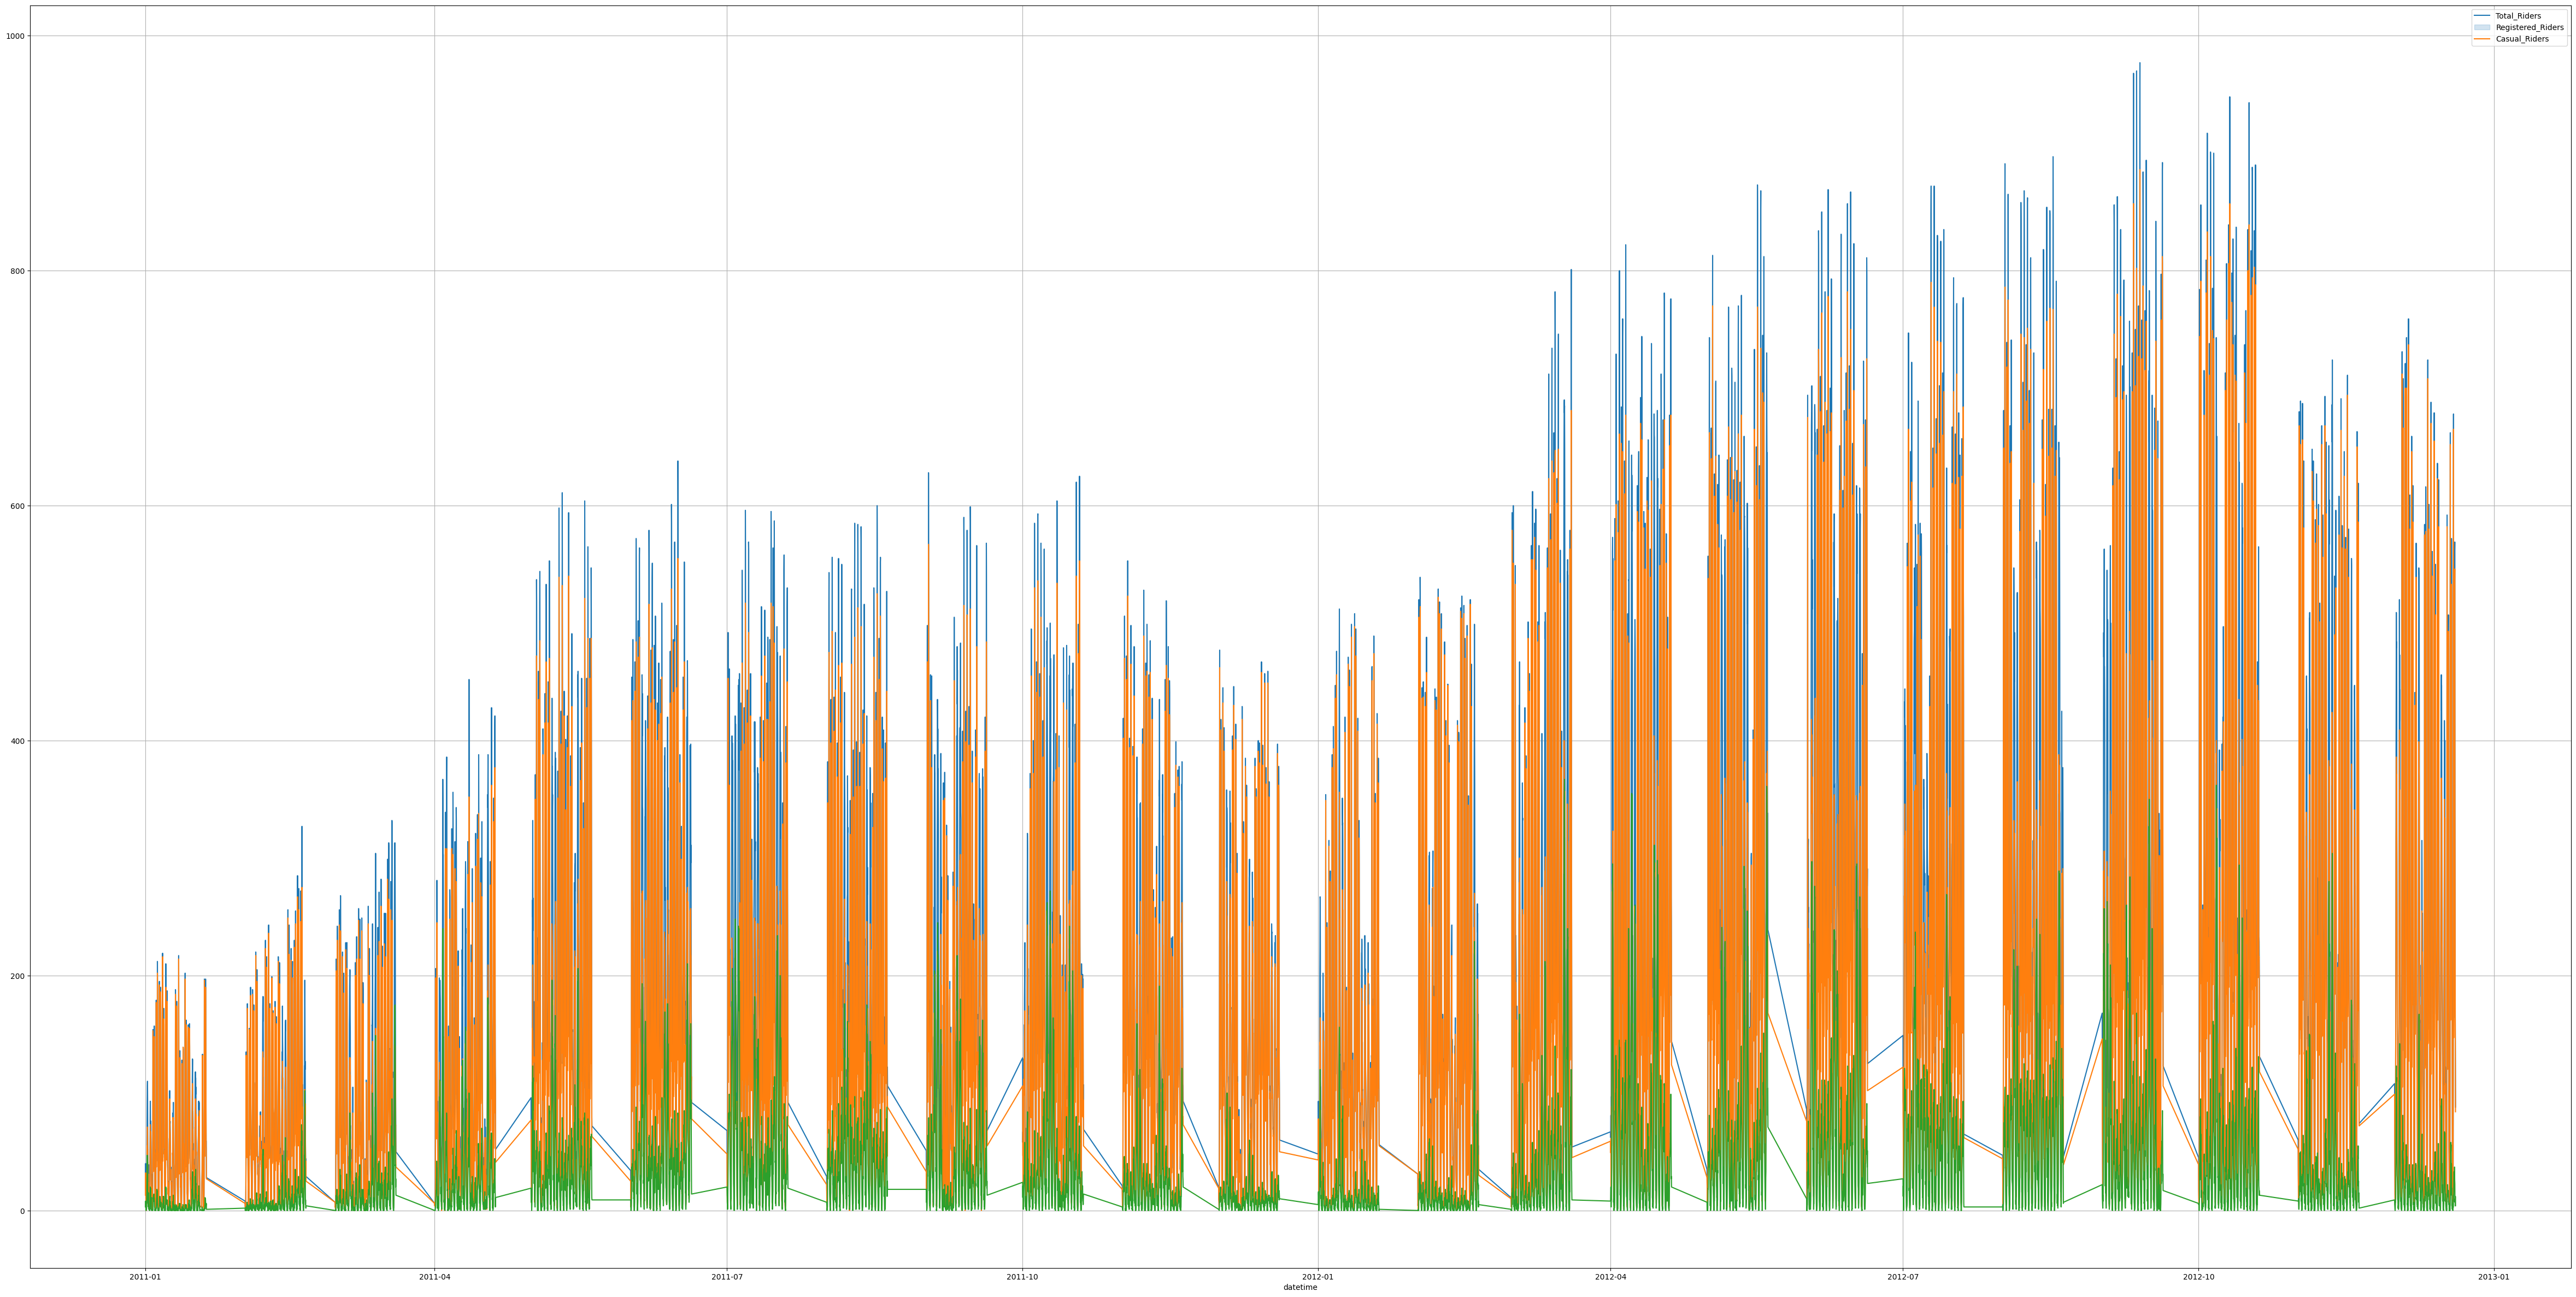

In [ ]:
plt.figure(figsize=(60,30))
sns.color_palette('husl')
sns.lineplot(x = df['datetime'],y = df['count'].values)
sns.lineplot(x = df['datetime'],y = df['registered'].values)
sns.lineplot(x = df['datetime'],y = df['casual'].values)
plt.legend(['Total_Riders','Registered_Riders','Casual_Riders'])
plt.grid()
plt.show()

Distribution of Casual, Registered and Total Riders by Season


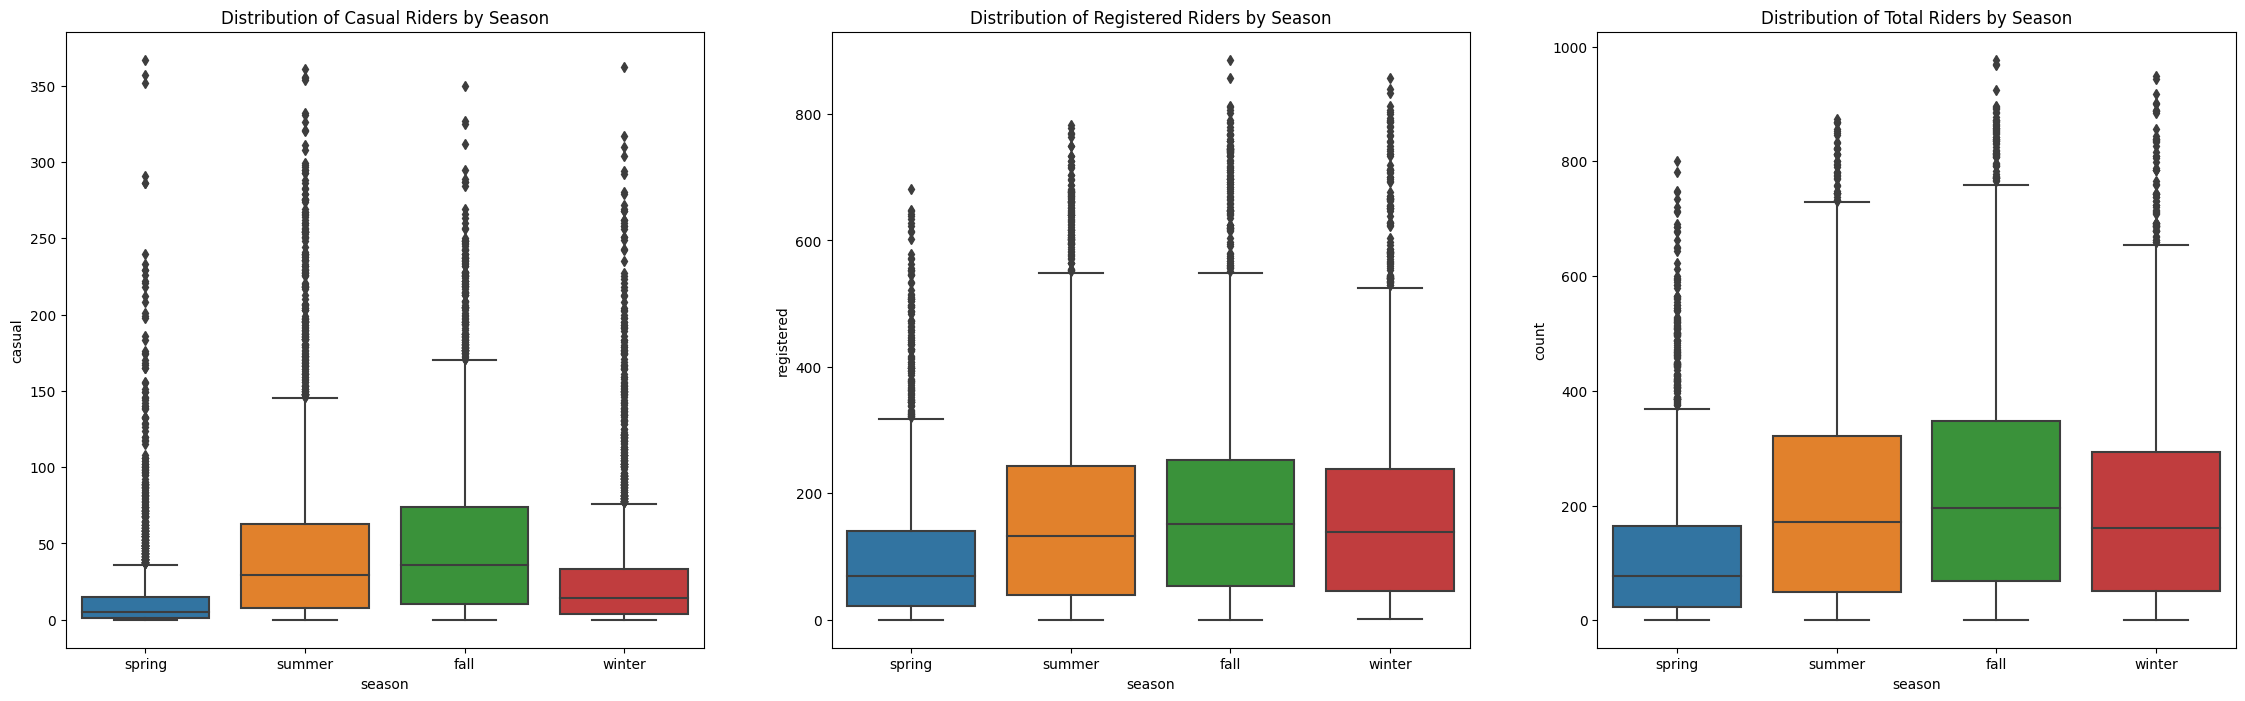

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=df, y="casual", x = 'season', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Season')

sns.boxplot(data=df, y="registered", x = 'season', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Season')

sns.boxplot(data=df, y="count", x = 'season', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Season')

plt.show()

The median number of casual, registered and total riders is highest in fall and summer season
followed by winter and spring season.

Distribution of casual ragistered and total rider by holiday

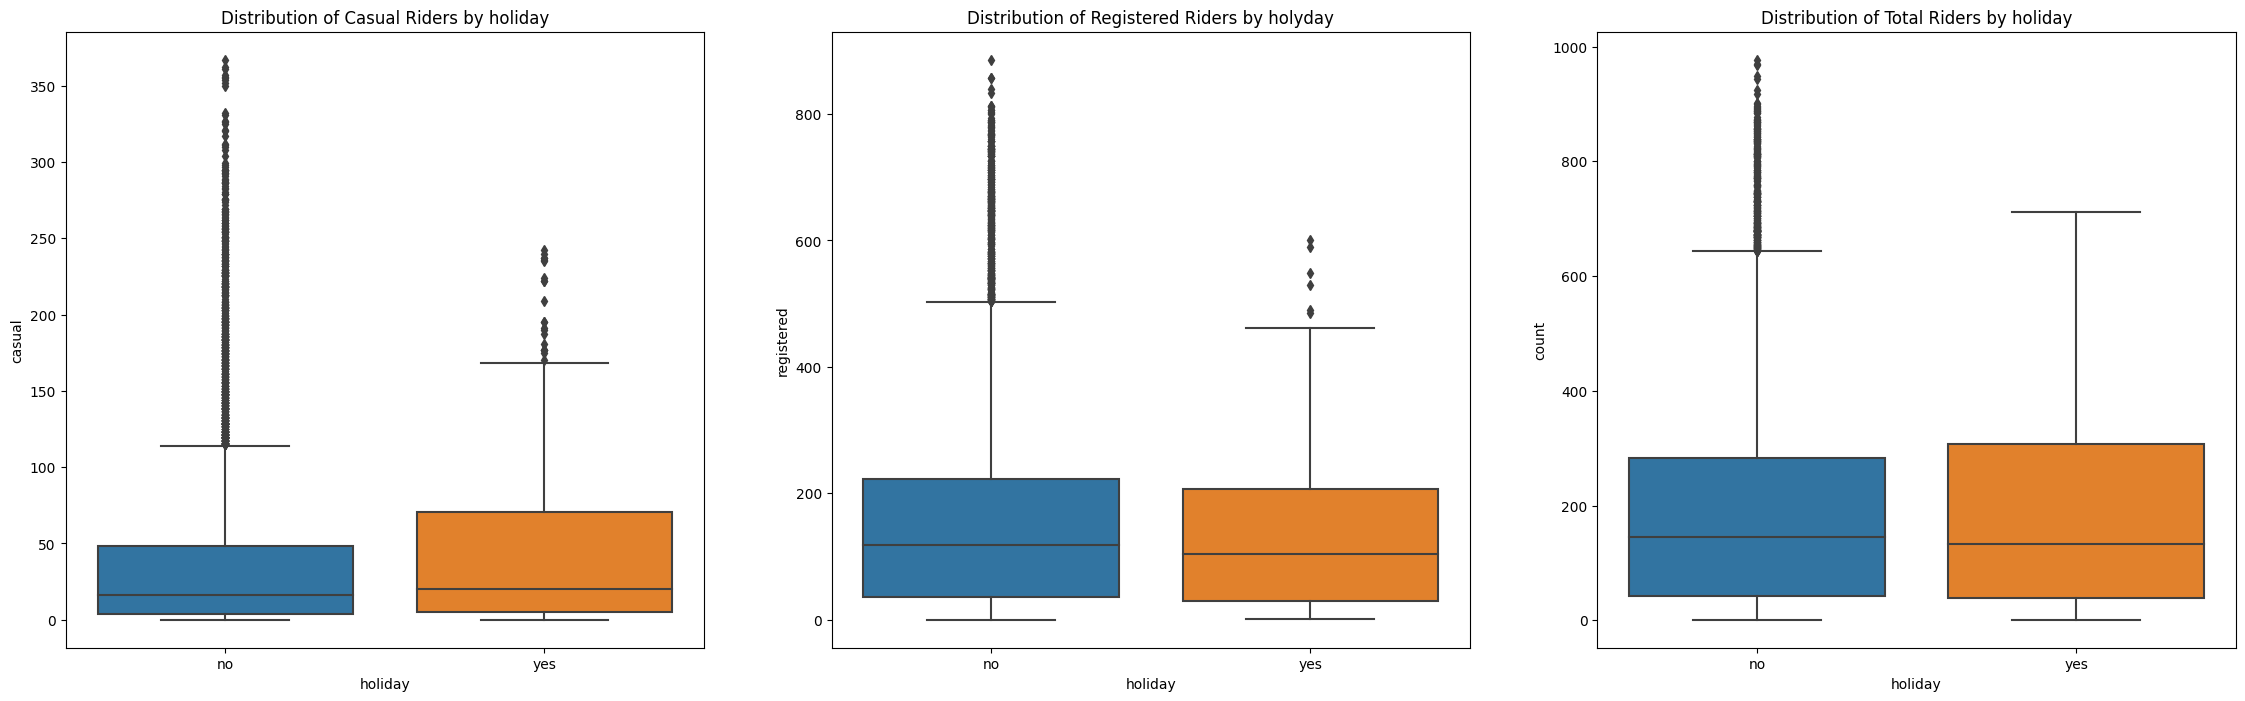

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=df, y="casual", x = 'holiday', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by holiday')

sns.boxplot(data=df, y="registered", x = 'holiday', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by holyday')

sns.boxplot(data=df, y="count", x = 'holiday', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by holiday')

plt.show()

The median number of casual, registered and total riders is almost equal irrespective of whether
it is a holiday or not.[link text](https://)

Distribution of casual ragistered and total rider over workingday

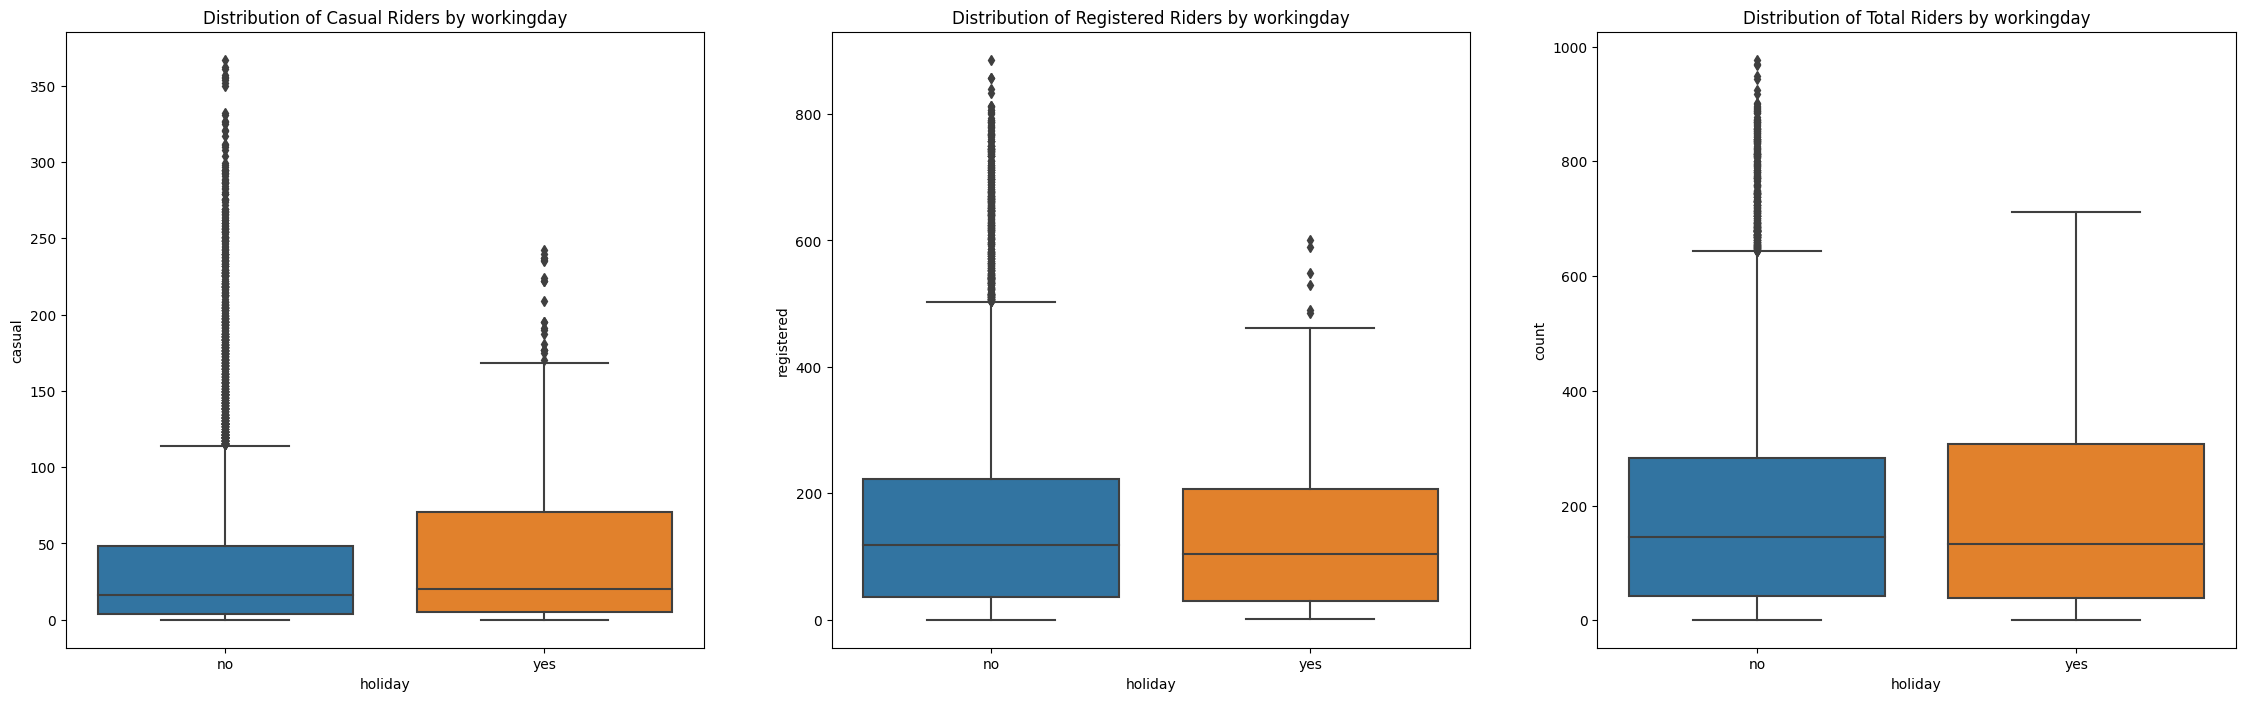

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=df, y="casual", x = 'holiday', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by workingday')

sns.boxplot(data=df, y="registered", x = 'holiday', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by workingday')

sns.boxplot(data=df, y="count", x = 'holiday', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by workingday')

plt.show()

The median number of casual, registered and total riders is almost equal irrespective of whether
it is a workingday or not

Distribution of casual ragistered and total riders over weather

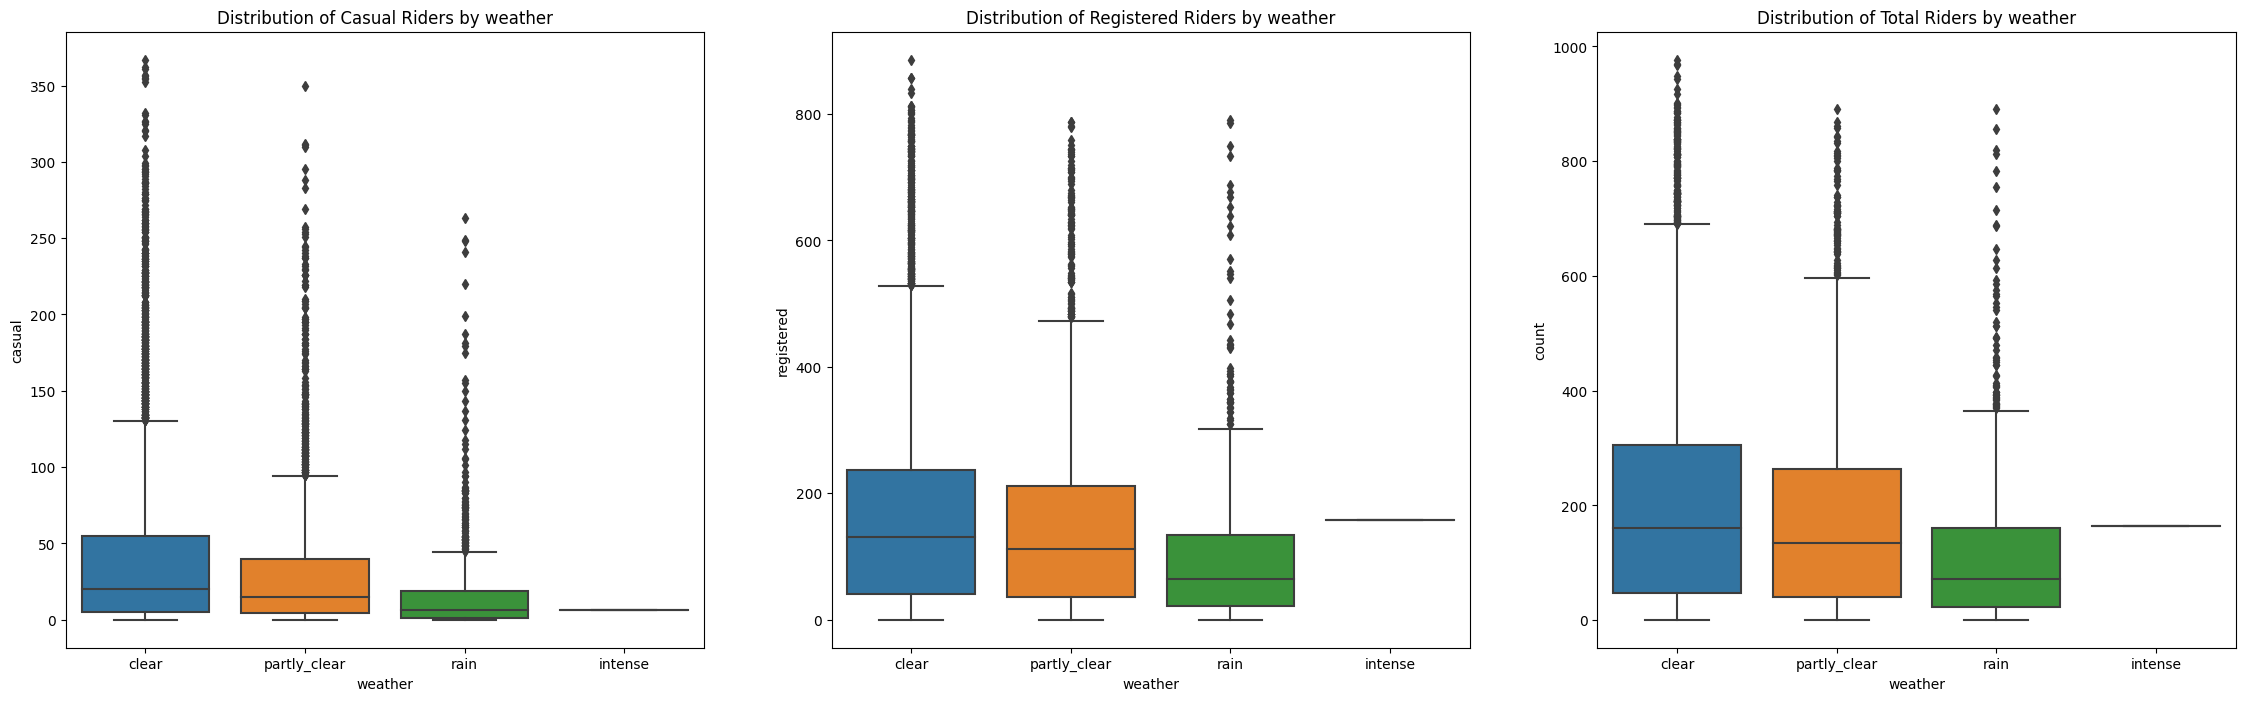

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=df, y="casual", x = 'weather', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by weather')

sns.boxplot(data=df, y="registered", x = 'weather', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by weather')

sns.boxplot(data=df, y="count", x = 'weather', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by weather')

plt.show()

The median number of casual, registered and total riders is highest when the weather is clear,
followed by the number of casual, registered and total riders when the weather is partly_clear.

**[Correlation among different factors](https://)**

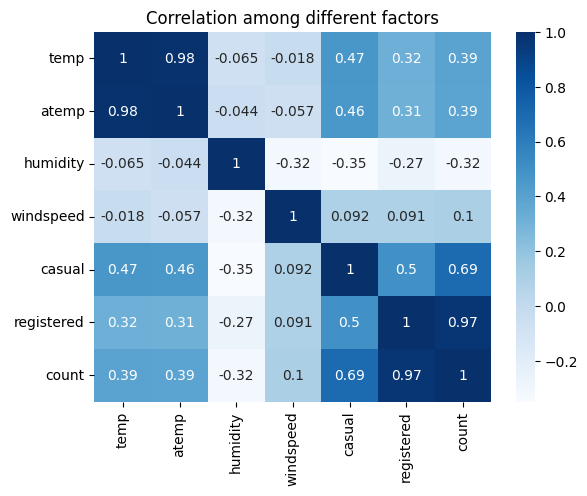

In [ ]:
df1 = df.corr()
plt.figsize = (20,15)
sns.heatmap(df1, annot = True, cmap = "Blues")
plt.title("Correlation among different factors")
plt.show()

There is a very less correlation between {temperature, feeling temperature, humidity and windspeed}
and {casual, registered and count} variables.

There is a very strong correlation between temperature and feeling temperature.

There is a very strong correlation between casual and total riders, as casual riders
contribute to the total number of riders for Yulu.

There is a very strong correlation between registered and total riders, as registered riders
contribute to the total number of riders for Yulu.

# Hypothesis testing

# Effect of working day on number of electric cycles rented

H0 = Working days does not have effect on number of cycle rented

Ha = Working days have effect on number of cycle rented

significance level = 0.05

In [ ]:
working_day_no = df[df["workingday"]== "no"]["count"]
working_day_yes = df[df["workingday"]== "yes"]["count"]

In [ ]:
test_stat, p_value = ttest_ind(working_day_no,working_day_yes)
print(test_stat)
print(p_value)
if p_value < 0.05:
  print("reject the null hypothesis")
else:
  print("fail to reject null hypothesis")

-1.2096277376026694
0.22644804226361348
fail to reject null hypothesis


Inshight

since the result is fail to reject the null hypothesis it means the workingdays have effect on the number of electric cycle rented

##  No. of cycles rented similar or different in different seasons


No. of cycles rented similar or different in different seasons

H0 = season does not have effect on number of cycle rented

Ha = season has effect on the number of cycle rented

significance level  = 0.05


In [ ]:
season_spring = df[df["season"] == "spring"]["count"]
season_summer = df[df["season"] == "summer"]["count"]
season_fall = df[df["season"] == "fall"]["count"]
season_winter = df[df["season"] == "fall"]["count"]

In [ ]:
test_stat,p_value = f_oneway(season_spring,season_summer,season_fall,season_winter)
print(test_stat)
print(p_value)
if p_value < 0.05:
  print("reject the null hypothesis")
else:
  print("fail to reject null hypothesis")


264.50193816721185
1.0533628242092138e-165
reject the null hypothesis


Insights

since p_value is much lesser than significance level we reject the null hypothesis

it means season has no effect on number of cycle rented

## Number of cycles rented similar or different in different weather


H0 = weather has no effect on number of cycle rented

Ha = weather has effect on the number of cycle rented

significance level

In [ ]:
weather_clear = df[df["weather"] == "clear"]["count"]
weather_partly_clear = df[df["weather"] == "partly_clear"]["count"]
weather_rain = df[df["weather"] == "rain"]["count"]
weather_intense = df[df["weather"] == "intense"]["count"]

In [ ]:
test_stat, p_value = f_oneway(weather_clear,weather_partly_clear,weather_rain,weather_intense)
print(test_stat)
print(p_value)
if p_value < 0.05:
  print("reject the null hypothesis")
else:
  print("fail to reject the null hypothesis")

65.53024112793271
5.482069475935669e-42
reject the null hypothesis


Insights

since p_value is much lesser than signifcance value means null hypothesis rejected

it means weather has no effect on number of cycle rented

# Dependency of Weather on Seasons

Ho: Weather is independent on season

H1: Weather is dependent on season

Significance Level(α): 0.05 or 5%

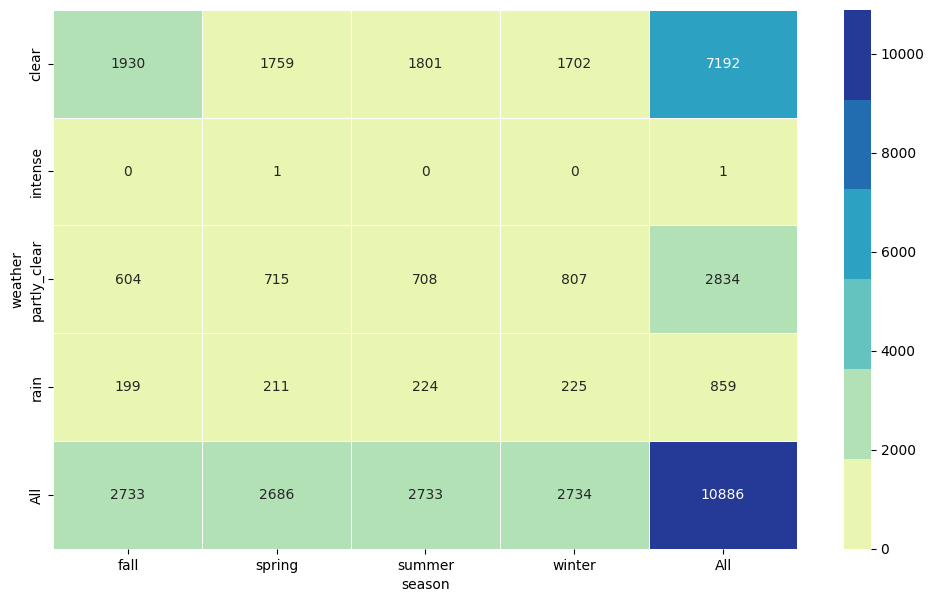

In [ ]:
df1 = pd.crosstab(index = df["weather"], columns = df["season"], margins = True)
colormap = sns.color_palette("YlGnBu")
plt.figure(figsize=(12,7))
sns.heatmap(df1, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

observed = [[1930, 1759, 1801, 1702],
            [604, 715, 708, 807],
            [199, 211, 224, 225]]

chi2_contingency(observed)

Chi2ContingencyResult(statistic=46.101457310732485, pvalue=2.8260014509929403e-08, dof=6, expected_freq=array([[1805.76352779, 1774.04869086, 1805.76352779, 1806.42425356],
       [ 711.55920992,  699.06201194,  711.55920992,  711.81956821],
       [ 215.67726229,  211.8892972 ,  215.67726229,  215.75617823]]))

In [ ]:
test_stat = 46.10
p_value = 2.82e-08
if p_value < 0.05:
  print("reject the null hypothesis")
else:
  print("fail to reject null hypothesis")

reject the null hypothesis


# Insights:

Since, pvalue(2.8260014509929403e-08) is lesser than Significance Level(α) i.e 0.05, we reject the
null hypothesis that - weather is independent of season

## Test of Normality


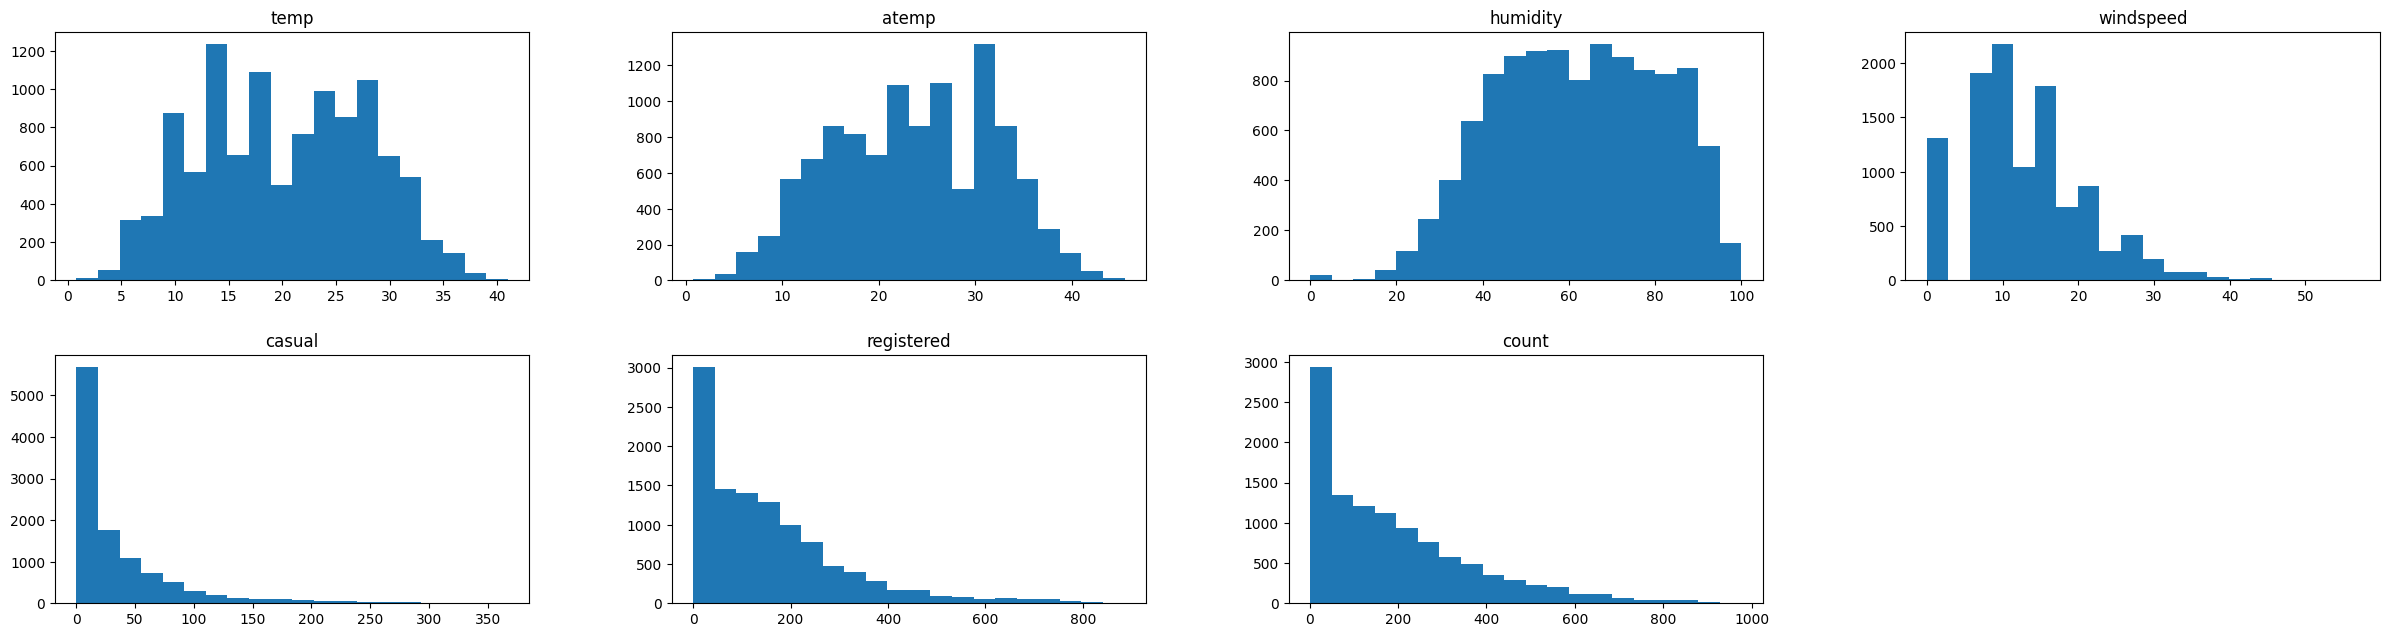

In [ ]:
df_count = df[['temp','atemp','humidity','windspeed','casual','registered','count']]
df_count.hist(layout = (5,4),figsize = (30,20), grid = False, bins = 20)
plt.show()

# from above plot the distribution of avobe plot of all variables is skewed and hence not normally distributed

# Q-Q plot

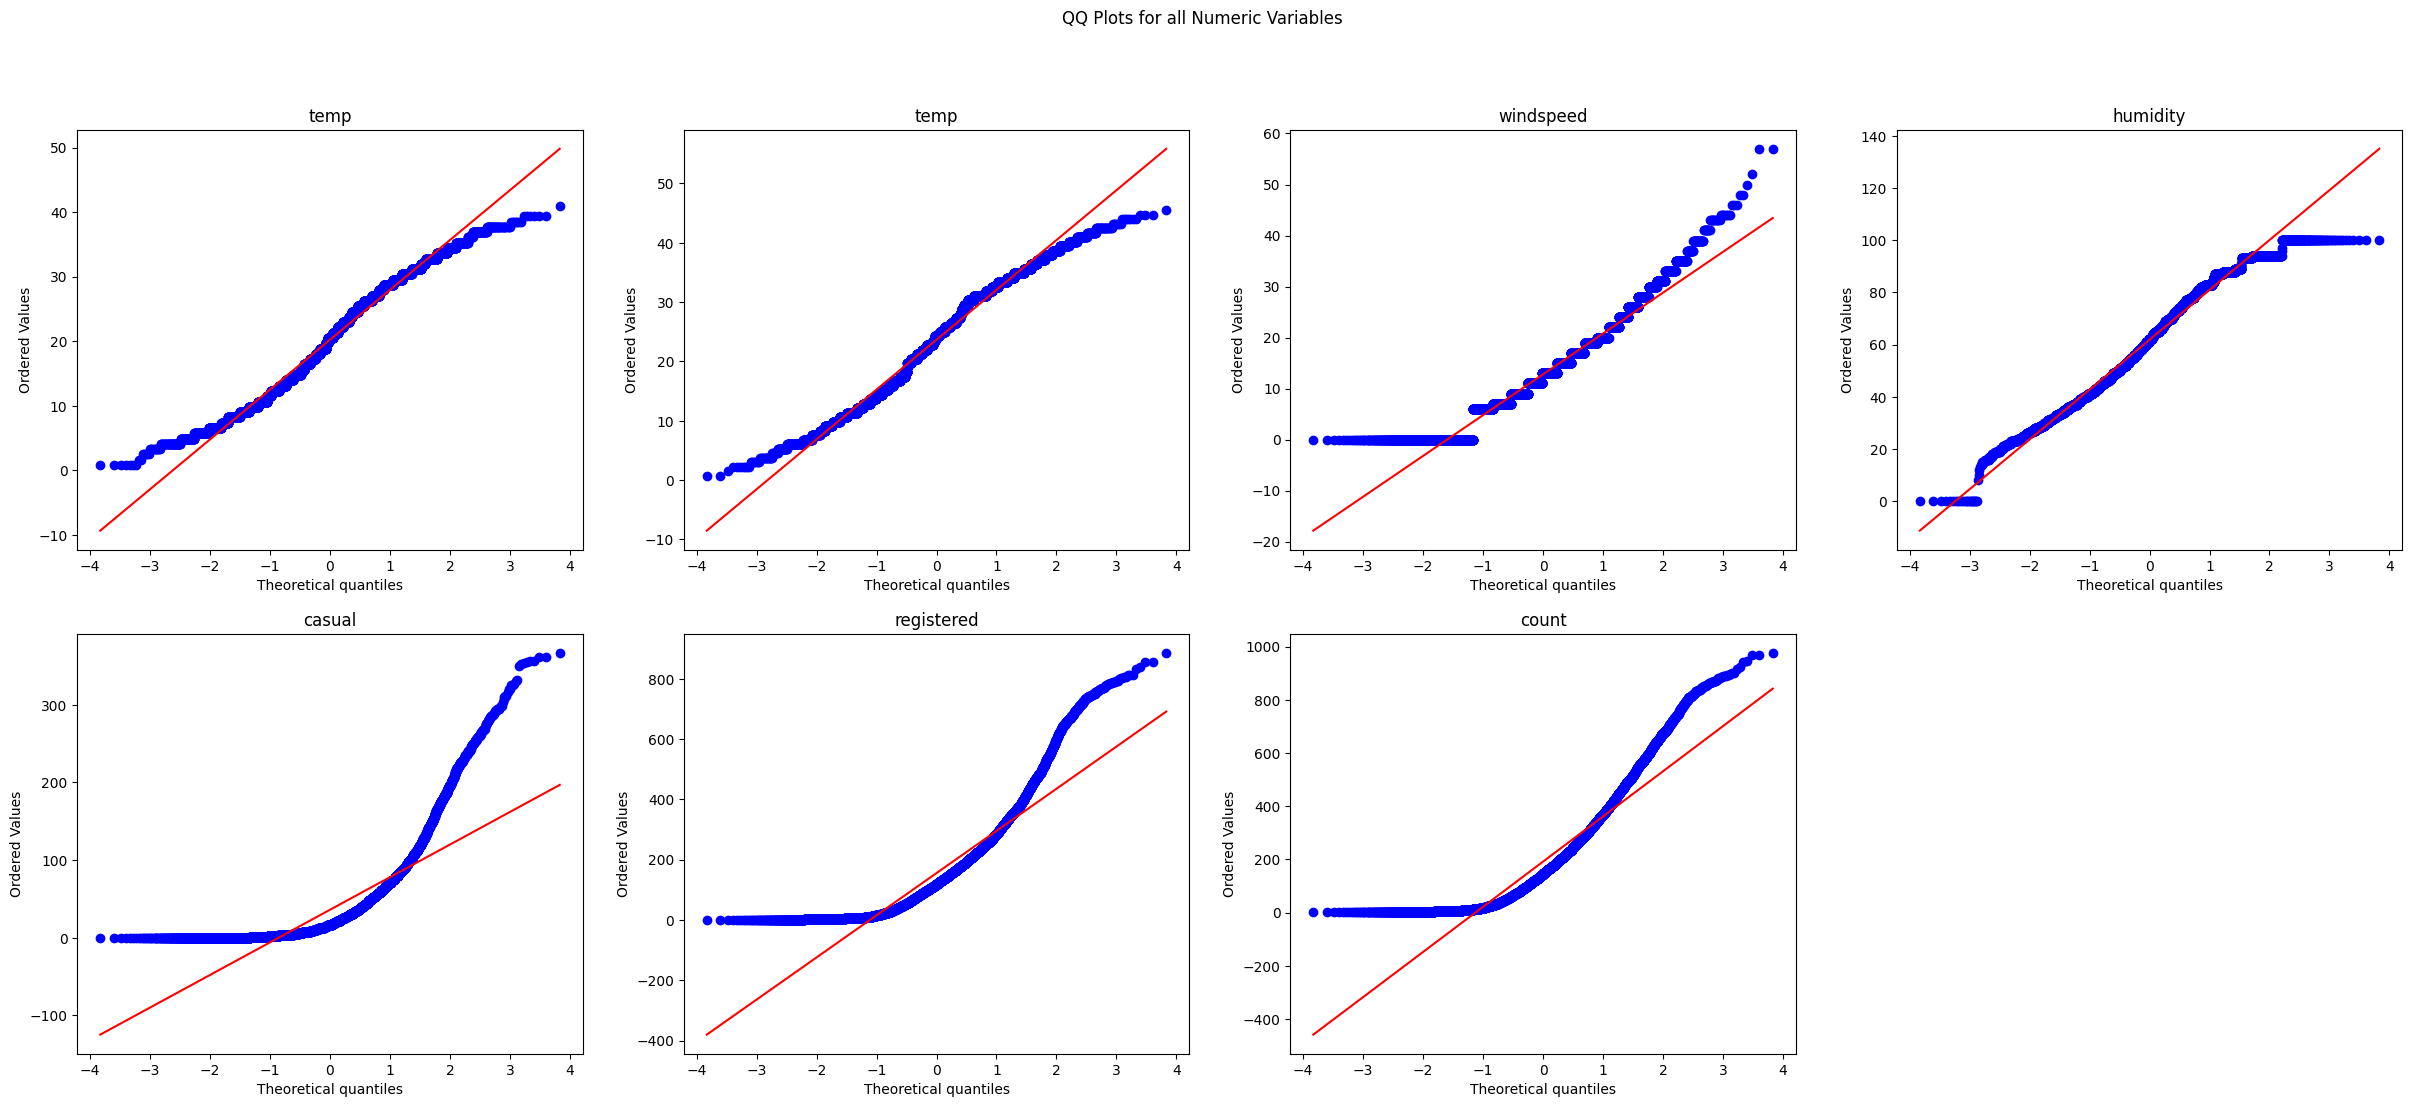

In [ ]:
import pylab
import scipy.stats as stats

plt.figure(figsize=(30,12))

ax1 = plt.subplot(241)
res = stats.probplot(df_count['temp'], dist="norm", plot=plt)
ax1 = plt.title('temp')

ax2 = plt.subplot(242)
res = stats.probplot(df_count['atemp'], dist="norm", plot=plt)
ax2 = plt.title('temp')

ax3 = plt.subplot(243)
res = stats.probplot(df_count['windspeed'], dist="norm", plot=plt)
ax3 = plt.title('windspeed')

ax4 = plt.subplot(244)
res = stats.probplot(df_count['humidity'], dist="norm", plot=plt)
ax4 = plt.title('humidity')

ax5 = plt.subplot(245)
res = stats.probplot(df_count['casual'], dist="norm", plot=plt)
ax5 = plt.title('casual')

ax6 = plt.subplot(246)
res = stats.probplot(df_count['registered'], dist="norm", plot=plt)
ax6 = plt.title('registered')

ax7 = plt.subplot(247)
res = stats.probplot(df_count['count'], dist="norm", plot=plt)
ax7 = plt.title('count')

plt.suptitle('QQ Plots for all Numeric Variables')
plt.show()

## Insights:

From the QQ-Plot we observe that none of the variables is looking straight, hence showing
deviation from normal distribution.

# Levene's Test

# Levene's Test for equality of variance for number of riders for 4 different seasons

 Ho: Variance is equal for all seasons

H1: Variance is not equal for all seasons (atleast one of the season has a variance different from the others)

significanc level = 0.05

In [ ]:
from scipy.stats import levene

test_stat, p_value = levene(weather_clear, weather_partly_clear, weather_rain, center ='median')

In [ ]:
print(test_stat)
print(p_value)
if p_value < 0.05:
  print("reject the null hypothesis")
else:
  print("Fail to reject null hypothesis")

81.67574924435011
6.198278710731511e-36
reject the null hypothesis


Insights:

Since, pvalue(6.198278710731511e-36) is lesser than Significance Level(α) i.e 0.05, we reject the
null hypothesis that - Variance is equal for all seasons

## Levene's Test for equality of variance for number of riders for 4 different weather

Ho: Variance is equal for all weathers

H1: Variance is not equal for all weathers

In [ ]:
test_stat, p_value = levene(season_spring, season_summer, season_fall, season_winter, center ='median')
print(test_stat)
print(p_value)
if p_value < 0.05:
  print("reject the null hypothesis")
else:
  print("Fail to reject null hypothesis")

205.90067966605676
6.650061241849672e-130
reject the null hypothesis


Insight:

Since, pvalue is lesser than Significance Level(α) i.e 0.05, we reject the
null hypothesis that - Variance is equal for all weathers

## Levene's Test for equality of variance for number of riders as per working day



Ho: Variance is equal irrespective of working day or not

H1: Variance is not equal irrespective of working day or not

In [ ]:
test_stat, p_value = levene(working_day_no, working_day_yes, center ='median')
print(test_stat)
print(p_value)
if p_value < 0.05:
  print("reject the null hypothesis")
else:
  print("Fail to reject null hypothesis")

0.004972848886504472
0.9437823280916695
Fail to reject null hypothesis


Insights:

Since, pvalue(0.9437823280916695) is greater than Significance Level(α) i.e 0.05, we fail to
reject the null hypothesis that - Variance is equal irrespective of whether it is a working day
or not.

## Levene's Test for equality of variance for number of riders as per holiday



Ho: Variance is equal irrespective of holiday or not

H1: Variance is not equal irrespective of holiday or not

In [ ]:
test_stat, p_value = levene(df[df["holiday"] == "no"]["count"], df[df["holiday"] == "yes"]["count"])
print(test_stat)
print(p_value)
if p_value < 0.05:
  print("reject the null hypothesis")
else:
  print("Fail to reject null hypothesis")

1.222306875221986e-06
0.9991178954732041
Fail to reject null hypothesis


Insights:

Since, pvalue(0.9991178954732041) is greater than Significance Level(α) i.e 0.05, we fail to
reject the null hypothesis that - Variance is equal irrespective of whether it is a holiday
or not.

## Shapiro-Wilk Test


Shapiro-Wilk Test is used to test Normality.

Assumption: The sample is coming from a normal distribution

Setting up Hypothesis Framework

Ho: Sample comes from a normal distribution

H1: Sample is not coming from a population which is normally distributed

Significance Level(α): 0.05 or 5%

In [ ]:
from scipy.stats import shapiro

print('Insights:')
print(end = '\n')

for i in list(df_count.columns):

  test_statistic, p_value = stats.shapiro(df_count[i])

  print('********************************************************************************************')

  print(f'The test-statistic for {i} is {test_statistic} with p_value {p_value}')

  if p_value > 0.05:

    print('Hence at 95% confidence level, we fail to reject null hypothesis')
    print(f'Hence we can say that {i} is coming from normally distributed population')

  else:
    print('Hence at 95% confidence level, we reject null hypothesis')
    print(f'Hence we can say that {i} is not coming from normally distributed population')

  print('********************************************************************************************')
  print(end = '\n')


Insights:

********************************************************************************************
The test-statistic for temp is 0.9804227352142334 with p_value 4.577117001754969e-36
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that temp is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
The test-statistic for atemp is 0.9815532565116882 with p_value 3.35599504562436e-35
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that atemp is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
The test-statistic for humidity is 0.9822683930397034 with p_value 1.244270413072

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Recommendations:
1) As from 2 Sample T-test we have seen that holiday has no impact on the number of riders
at 95% confidence level, Yulu should run similar promotional-campaigns/offers irrespective
of whether it is a holiday or not.

2) As from 2 Sample T-test we have seen that working day has no impact on the number of riders
at 95% confidence level, Yulu should run similar promotional-campaigns/offers irrespective
of whether it is a working day or not.

3) As we have seen from Analysis of Variance(ANOVA), that mean number of riders is statistically
different at 95% confidence level for different seasons, Yulu should have different strategies
for different seasons. Yulu should try to increase the riders in the months of fall and winter
when the number of riders goes down considerably and maximize capacity utilization of e-bikes
in the months of summer and fall.

4) As we have seen from Analysis of Variance(ANOVA), that mean number of riders is statistically
different at 95% confidence level for different weathers, Yulu should have different strategies
for different weathers. Yulu should try to maximize the capacity utilization of e-bikes
when the weather is clear or partly clear.

5) As we have seen from Chi-Square Test that weather is dependent on seasons at 95% confidence level.
Yulu should maximize the capacity utilization or rides in every season when the weather is
clear or partly_clear.

6) Yulu should perform demand forecasting as we have seen that there is trend and seasonality
in the data. Better demand forecasting will lead to better capacity utilization of e-bikes
in different seasons.

7) Yulu should also perform further investigation into the riders based on gender and age as
insights into age bracket and gender would reveal a lot about the week on week capacity
utilization on the type of customers preferring Yulu e-bikes.
